Scipy pour faire des calculs scientifiques: interpolations, optimisation de problèmes, traitement de signal 
grace à la transformée de fourier

différents modules dont ceux pour faire de l'algèbre linéaire (scipy.linalg)ou statistiques (scipy.stats)

**Module INTERPOLATE**

ça sert à travailler sur des problèmes pour lesquels on a des data manquantes interpolation pour faire avec ce qu'on a 

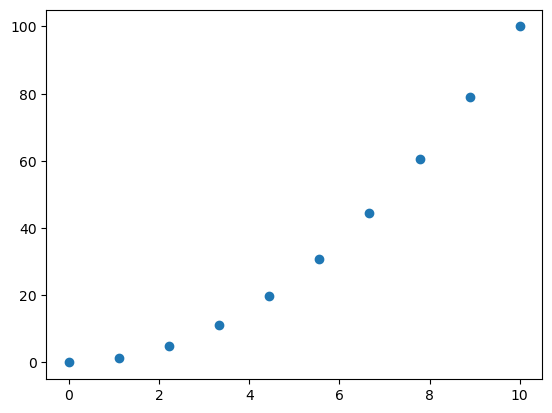

In [179]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0, 10, 10) #(start, stop, nombre de points)
y=x**2
plt.scatter(x, y)


Notre but va étre de remplir le graphe avec plus de points entre ceux qu'on a déjà

In [181]:
from scipy.interpolate import interp1d

interp1d nous génére une fonction f qui va étre notre fonction d'interpolation

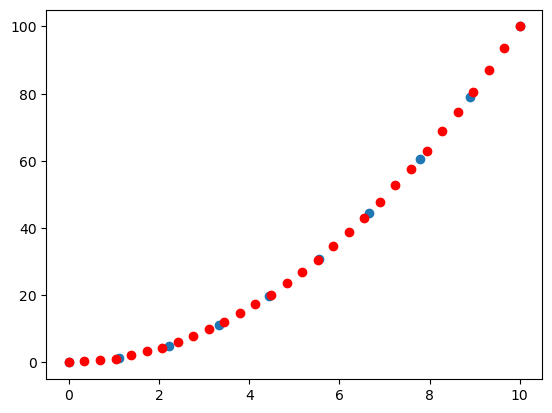

In [183]:
f= interp1d(x, y, kind='linear') 
#(variable1, variable2, kind='linear')pour dire qu'on veut tracer une ligne entre 2 pts
new_x= np.linspace(0, 10, 30) #notre nouvel axe 30 pts au lieu de 10
result= f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

autre type d'interpolation 

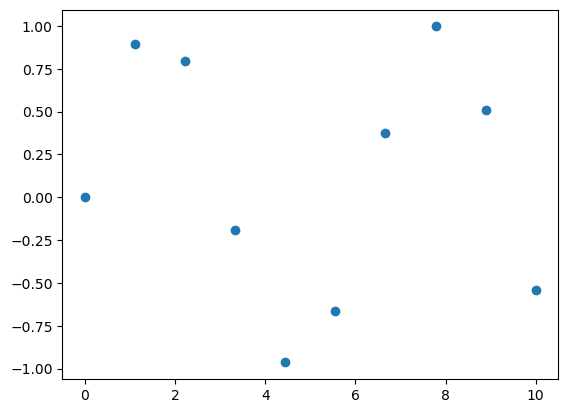

In [185]:
x= np.linspace(0, 10, 10)
y=np.sin(x)
plt.scatter(x,y)

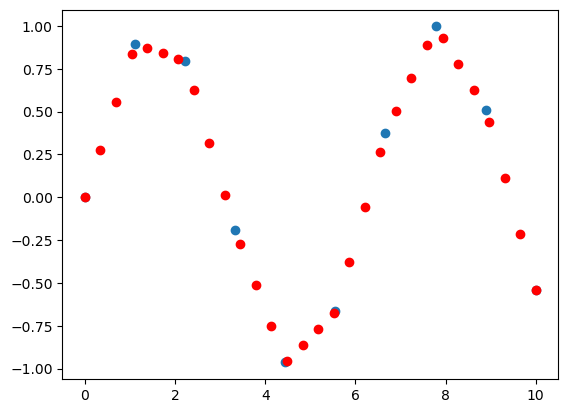

In [186]:
f= interp1d(x, y, kind='linear') 
#(variable1, variable2, kind='linear')pour dire qu'on veut tracer une ligne entre 2 pts
new_x= np.linspace(0, 10, 30) #notre nouvel axe 30 pts au lieu de 10
result= f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

pas ouf comme interpolation, on mettra plutot une interpolation cubique pour obtenir 

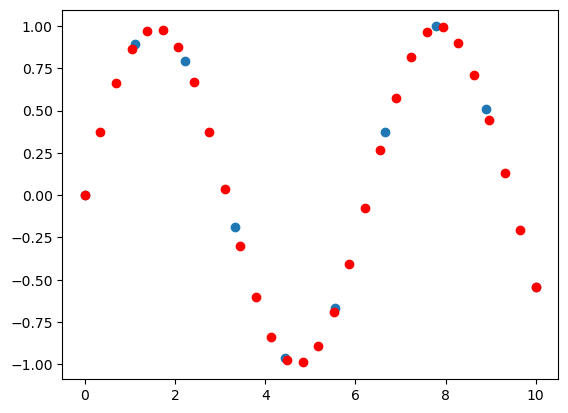

In [188]:
f= interp1d(x, y, kind='cubic') 

new_x= np.linspace(0, 10, 30) 
result= f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

**checker défintions mathématiques des différentes types d'interpolation linéaire, cubique, quadratique...**

Il y a interp2d On doit juste avoir 2 variables à interpoler au lieu d'une (x en haut)

**Module Optimize**

Pour optimize c'est pour des problèmes de **minimisation**, pour optimiser la position d'une courbe dans un nuage de points grace à la fonction curve_fit et faire de la programmation linéaire 

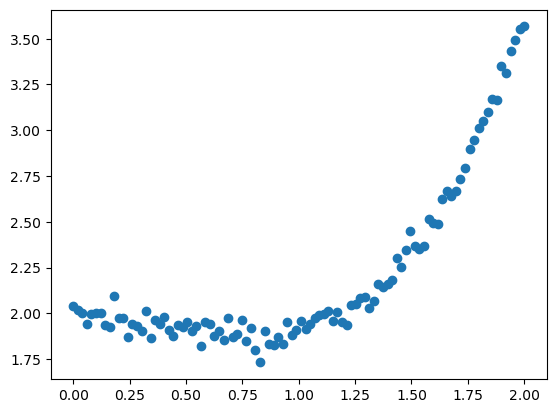

In [195]:
x=np.linspace(0,2, 100)
y=1/2*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
#np.random.randn(n) donne tableau de n nombre alétoires dans notre cas ça va étre 100
plt.scatter(x, y)

Pour développer un modèle statistique qui correspond parfaitement à ce nuage de points 

curve fit utilisera la méthode des moindres carrés pour trouver les bons paramètres du modèle f qu'on définit

In [199]:
def f(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

In [200]:
from scipy import optimize

In [201]:
optimize.curve_fit(f, x , y)

(array([ 0.5134321 , -0.63874301,  0.03802794,  1.98974241]),
 array([[ 0.00094441, -0.00283323,  0.00225522, -0.00036639],
        [-0.00283323,  0.00874726, -0.00726077,  0.00126255],
        [ 0.00225522, -0.00726077,  0.00644293, -0.00126901],
        [-0.00036639,  0.00126255, -0.00126901,  0.00034019]]))

Dans ces 2 tableaux, dans le prmeier on a les paramètres du modèle dans l'ordre
2e tableau montre la matrice de covariance du modèle ( la covariance montre juste comment 2 variables évoluent ensemble: dans le méme sens, variation opposée ou si valeurs ne sont pas liés sorte de corrélation) j'aurai pu l'utiliser par exemple à boralex pour voir le lien entre les factures elec de la batterie et les prix Day ahead


In [204]:
#on va enregistrer nos 2 tableaux dans des variables 

params, params_cov = optimize.curve_fit(f, x, y)

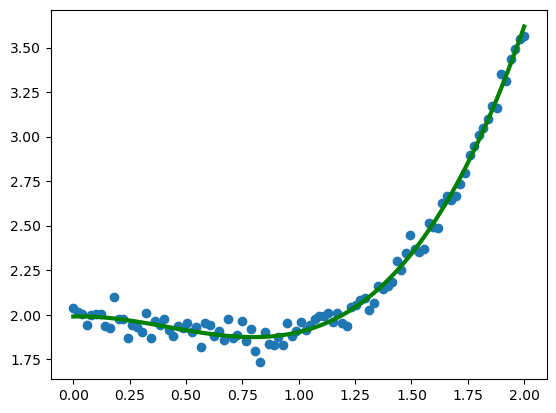

In [205]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1],params[2], params[3]), c='g', lw=3)

On a trouvé a b c d grace à la fonction optimize et voilà

**Module Minimisation**

ça va nous permettre de chercher le minimum d'une fonction un peu comme la descente de gradient et la vallée

In [210]:
def f(x):
    return x**2 + 15 * np.sin(x)

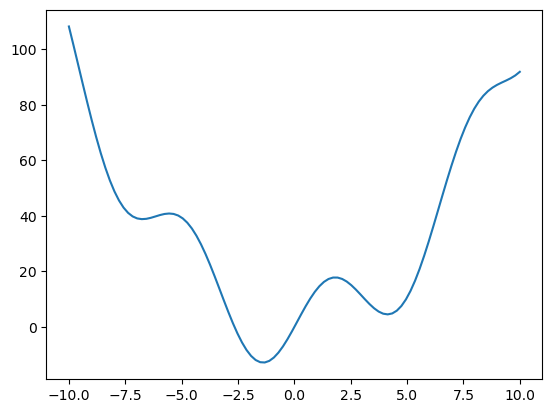

In [211]:
x= np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [212]:
optimize.minimize(f,x0=-8) #x0 point de départ à partir duquel on analyse en mode croissant



  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 38.81120617595851
        x: [-6.738e+00]
      nit: 6
      jac: [ 4.768e-07]
 hess_inv: [[ 1.164e-01]]
     nfev: 14
     njev: 7

Tout ce qui nous intéresse dans ce charabia c'est le message et la valeur de x

sauf que ce nombre est un minimum local alors qu'on cherche un global donc on va choisir un autre point de départ pour continuer


In [216]:
optimize.minimize(f,x0= -5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -12.823616887804414
        x: [-1.385e+00]
      nit: 4
      jac: [ 3.695e-06]
 hess_inv: [[ 5.979e-02]]
     nfev: 18
     njev: 9

In [217]:
#on voit sur la courbe que c'est bon 
#on garde le résultat sous le coude 
result= optimize.minimize(f,x0= -5).x


In [218]:
result

array([-1.38505583])

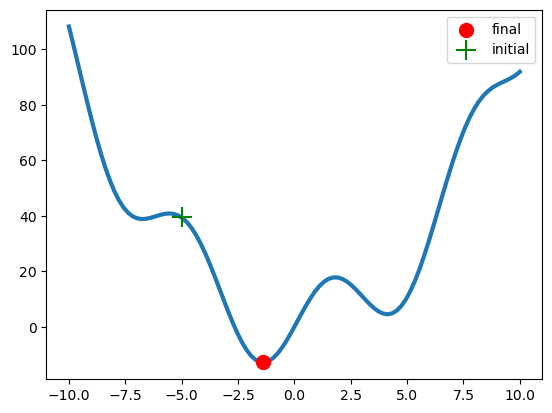

le minimum est aux coordonnées [-1.38505583]


In [220]:
#On peut aussi afficher ce qu'on a fait sur un graphique
x0=-5
plt.plot(x,f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='final') #Minimum global
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') #point de départ
plt.legend()
plt.show()

print('le minimum est aux coordonnées', result)

On peut aussi faire cela pour des fonctions à 2 dimensions 3 dimensions autant que tu veux

**Minimisation 2D** (à reprendre)


In [228]:
# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

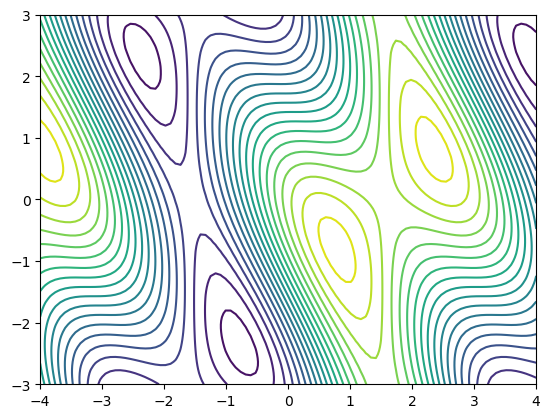

In [265]:
# x et y sont chacun des expaces 1d et avec meshgrid j'en fais un espace 2D définissant ainsi X
x = np.linspace(-4, 4, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

#X et y ne sont rien d'autre que les limites de la grille dans laquelle on représente notre fonction à 2 variables
#x est un vecteur de dimension 2 qu'on définit au moment où on utilise meshgrid donc f np array qui nous sort la superposition des 2 tableaux 1d 
#x et y pour obtenir un de 2D donc une grille de coordonnées


# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), 20)

#"f(np.array([x, y]" permet d'évaluer la fonction sur toute la grille sachant que x[0] c'est x et x[1] c'est y

le minimum est aux coordonées   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.414213562372366
        x: [-7.854e-01 -2.356e+00]
      nit: 9
      jac: [-1.356e-06  5.960e-08]
 hess_inv: [[ 7.147e-01 -7.204e-01]
            [-7.204e-01  2.141e+00]]
     nfev: 87
     njev: 29


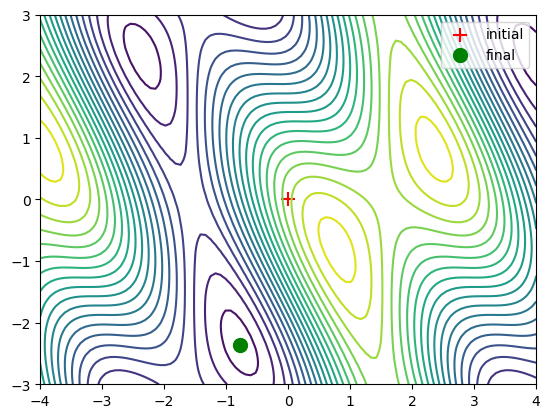

In [266]:
# Placement d'un point a0 initial aux coordonnées (0,0)
x0 = np.zeros(2)
# Minimisation de la fonction
result = optimize.minimize(f, x0)
print('le minimum est aux coordonnées', result) # imprimer le résultat

# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 20) # fonction 2D
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result.x[0], result.x[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.show()

In [271]:
x[1]

array([-4.        , -3.91919192, -3.83838384, -3.75757576, -3.67676768,
       -3.5959596 , -3.51515152, -3.43434343, -3.35353535, -3.27272727,
       -3.19191919, -3.11111111, -3.03030303, -2.94949495, -2.86868687,
       -2.78787879, -2.70707071, -2.62626263, -2.54545455, -2.46464646,
       -2.38383838, -2.3030303 , -2.22222222, -2.14141414, -2.06060606,
       -1.97979798, -1.8989899 , -1.81818182, -1.73737374, -1.65656566,
       -1.57575758, -1.49494949, -1.41414141, -1.33333333, -1.25252525,
       -1.17171717, -1.09090909, -1.01010101, -0.92929293, -0.84848485,
       -0.76767677, -0.68686869, -0.60606061, -0.52525253, -0.44444444,
       -0.36363636, -0.28282828, -0.2020202 , -0.12121212, -0.04040404,
        0.04040404,  0.12121212,  0.2020202 ,  0.28282828,  0.36363636,
        0.44444444,  0.52525253,  0.60606061,  0.68686869,  0.76767677,
        0.84848485,  0.92929293,  1.01010101,  1.09090909,  1.17171717,
        1.25252525,  1.33333333,  1.41414141,  1.49494949,  1.57

In [279]:
y.shape

(100, 100)

**TRAITEMENT DU SIGNAL(FOURIER)**

Plusieurs modules pour faire ça dont "scipy.signal" et d'autres qui permettent de faire des convolutions, des filtres...

scipy.fftpack pour faire des transformées de fourier

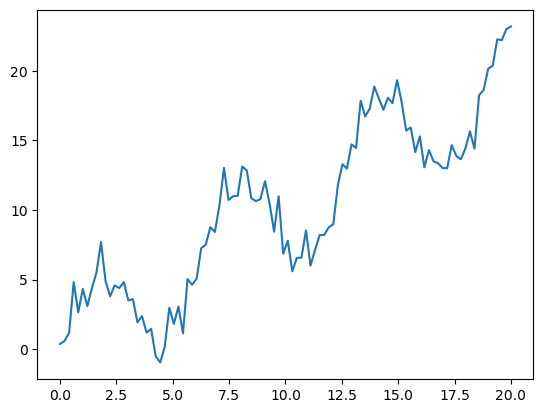

In [286]:
#exemple d'une fonction dans scipy.signal
x= np.linspace(0, 20, 100)
y= x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

cette fonction permet d'éliminer toute tendance linéaire dans un signal

In [289]:
from scipy import signal

In [291]:
new_y= signal.detrend(y)

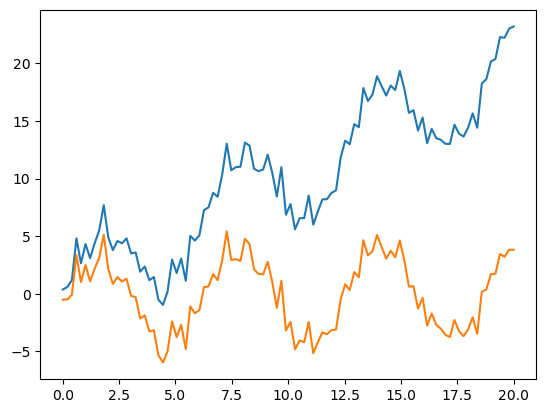

In [293]:
plt.plot(x,y)
plt.plot(x, new_y)

en gros detrend permet de se concentrer sur les variations naturelles du signal car des 
fois il oeut arriver que les variations soient lentes et la représentation va l'ignorer 
directement mettre une ligne en masquant les oscillations, la linéarité peut aussi étre du à une erreur de mesure 
ou une évolution naturelle qui n'est pas l'objet de l'étude exple hausse de température sur un enregistrement de vibrations

*Transformation de Fourier*

Technique maths qui permet d'extraire et analyser les fréquences d'un signal périodique
Dans la nature on mesurera des signaux(ou ondes) qui seront en fait une superposition de plusieurs ondes de fréquence différentes, la TDF permettra de les séparer pour pouvoir les étudier séparement
On aura comme résultat un spectre avec en abcisse des fréquences et en ordonnées une amplitude

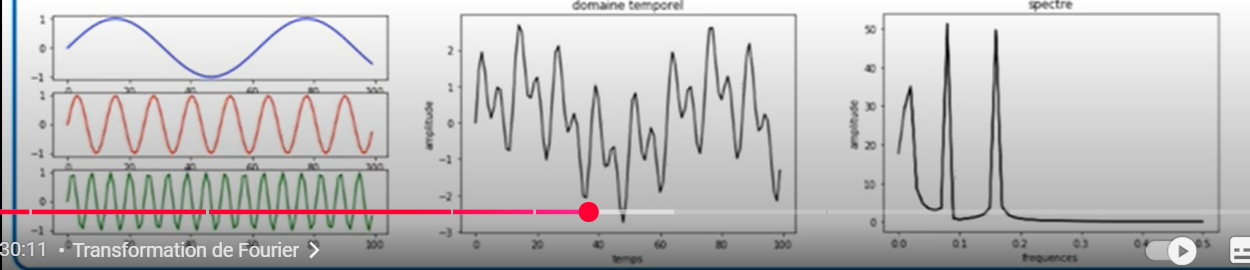

Sur la 1ère on a 3 ondes de fréquence différentes (ça se voit aux longueurs d'onde), Le 2e va étre ce qu'on va mesurer qui est en fait une combinaison des 3 et la dernière va étre l'extraction avec la TFD qui va nous dire quelle est celle qui "domine"

Pour faire ça on utilise 2 fonctions fft et fftfreq dans le module fftpack

Exple

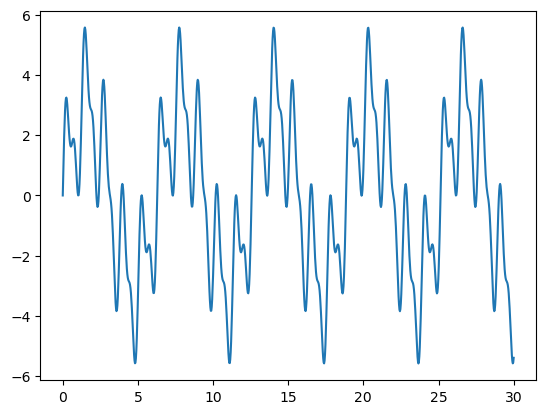

In [306]:
x = np.linspace(0, 30, 1000)
y= 3*np.sin(x) + 2* np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)

In [308]:
from scipy import fftpack

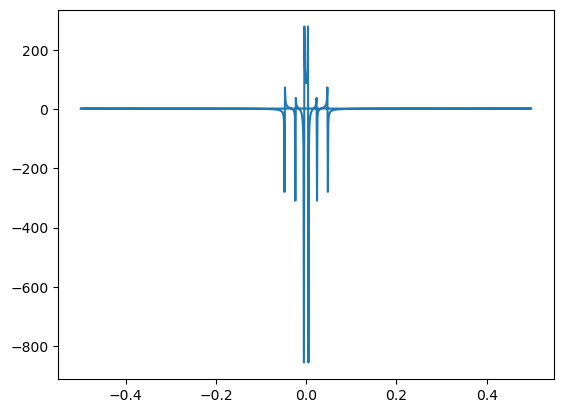

In [319]:
fourier = fftpack.fft(y)
frequences = fftpack.fftfreq(y.size)
plt.plot(frequences, fourier)

Là on a des fréquences négatives et des amplitudes négatives dd'où la nécessité de filtrer

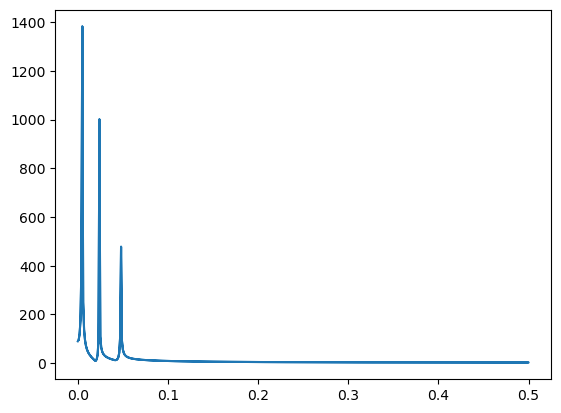

In [322]:
#on a juste fait une valeur absolue
power= np.abs(fourier)
plt.plot(np.abs(frequences), power)

et là c'est carré on a 3 fréquences 

En gros la transformée de fourier peut te permettre de tirer l'info utile dans un signal noyé dans du bruit. On peut faire cela en 3 étapes:
transformation de fourier pour avoir un spectre, du boolean indexing pour éliminer les valeurs négatives( plus précisément inférieures à un certain seuil) et dernière étape appliquer la transformée de fourier invers pour revenir dans le monde réel avec un signal purifié

Exemple

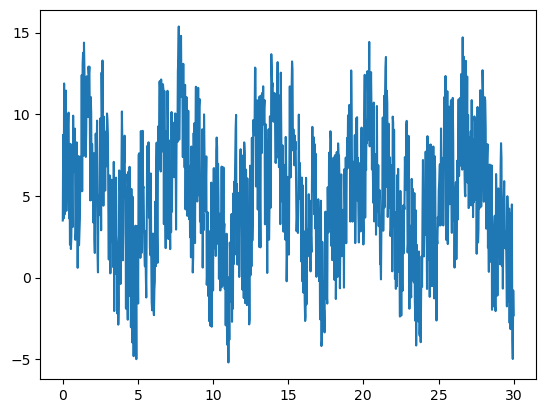

In [327]:
#On ajoute juste du bruit au précédent exemple pour illustrer la chose
x = np.linspace(0, 30, 1000)
y= 3*np.sin(x) + 2* np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)

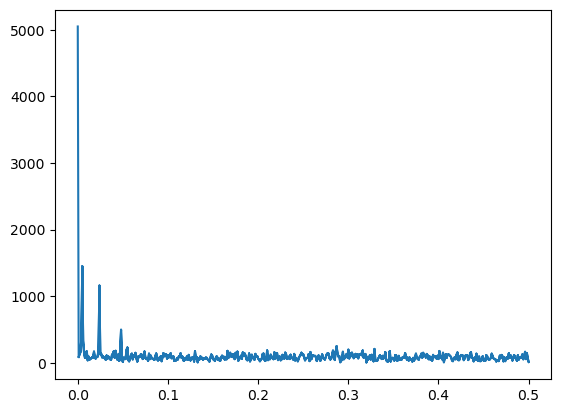

In [331]:
from scipy import fftpack

fourier = fftpack.fft(y)
power= np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

In [333]:
#On va filtrer maintenant
fourier [power<400]= 0
#en bas de 400(axe y)tu vois que c'est que du bruit 

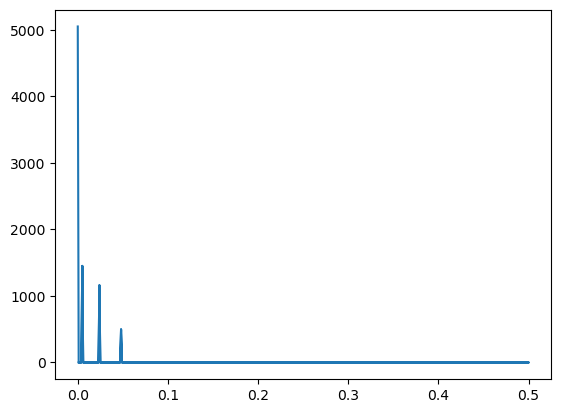

In [337]:
plt.plot(np.abs(frequences), np.abs(fourier))

Là on a un spectre nettoyé on applique la transformation de fourier inverse et basta
c'est un peu comme en physique des solides quand tu passes de l'espace réel à l'espace des k(ou vice-versa)
juste à cause d'un 2pi divisé ou multiplié

In [342]:
#ifft comme transformée de fourier inverse
filtered_signal= fftpack.ifft(fourier)

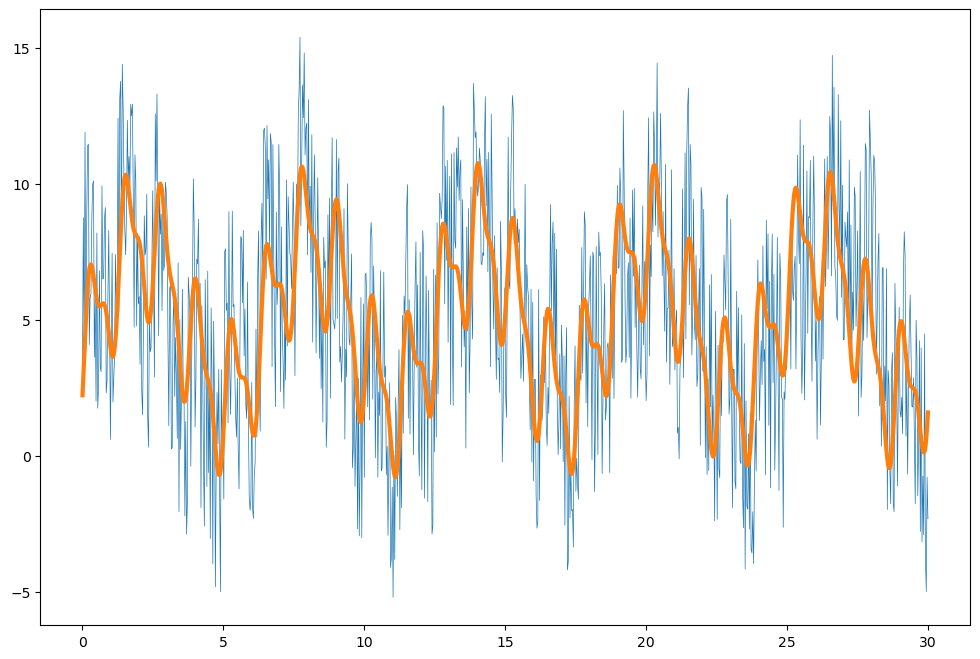

In [344]:
plt.figure(figsize=(12,8))
plt.plot(x,y, lw=0.5)
plt.plot(x, filtered_signal, lw=3)
plt.show()

Masterclass

Et là ça peut te permettre de faire de l'analyse des tendances des prix elec en écartant les variations aléatoires détecter les cycles journaliers hebdo...

**TRAITEMENT D'IMAGE**

NO NEED